In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings as wr
wr.filterwarnings("ignore")

In [2]:
# Importing the dataset
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Exploratory Data Analysis

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.shape

(145460, 23)

* There are 145460 observations (rows) and 23 features (columns) in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

* There are 7 categorical and 16 numerical variables in dataset.
* There are some missing values in the dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
df.describe(include = "object").T

,count,unique,top,freq
Date,145460,3436,2017-06-18,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


* Categorical variables `RainToday` and `RainTomorrow` are of boolean data type.

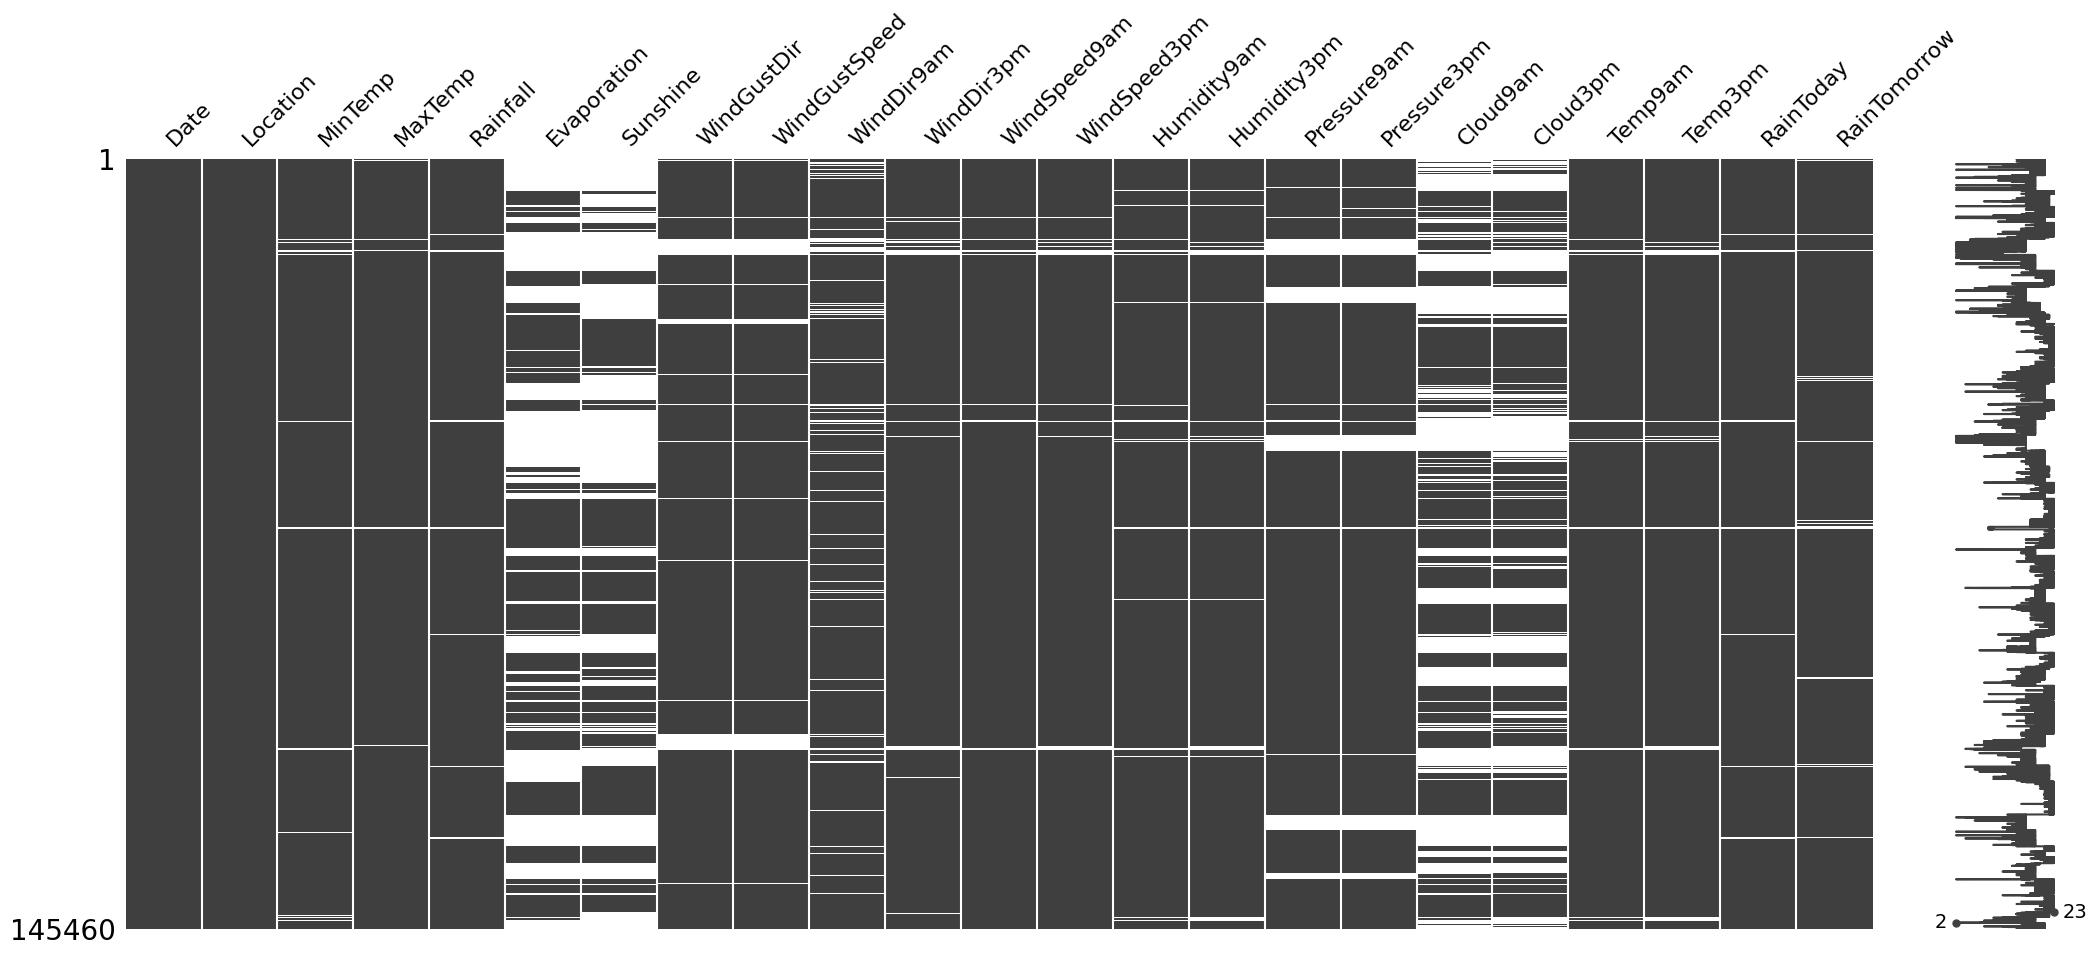

In [9]:
# Visualization of missing values
msno.matrix(df)
plt.show()

In [10]:
# Checking for missing values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
# Percentage of missing data in every column
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

* `Sunshine`, `Evaporation`, `Cloud3pm`, `Cloud9am` are the features having high missing values.

In [12]:
# Changing the type of Date feature
df["Date"] = pd.to_datetime(df["Date"])

# Split Date variable into year, month and day
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

## Univariate Analysis

In [14]:
# Categorical Variable
print("==================================")
print(df["Location"].value_counts())
print("==================================")
print(df["WindGustDir"].value_counts())
print("==================================")
print(df["WindDir9am"].value_counts())
print("==================================")
print(df["WindDir3pm"].value_counts())
print("==================================")
print(df["RainToday"].value_counts())
print("==================================")
print(df["RainTomorrow"].value_counts())
print("==================================")

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

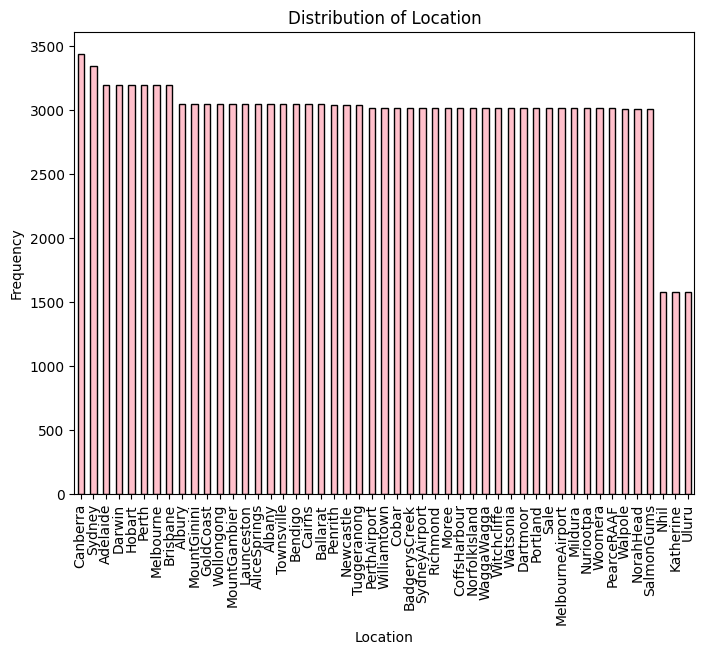

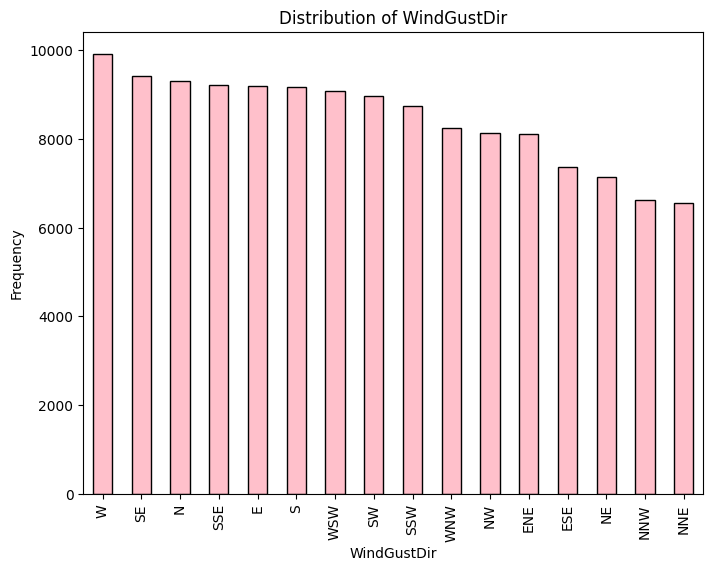

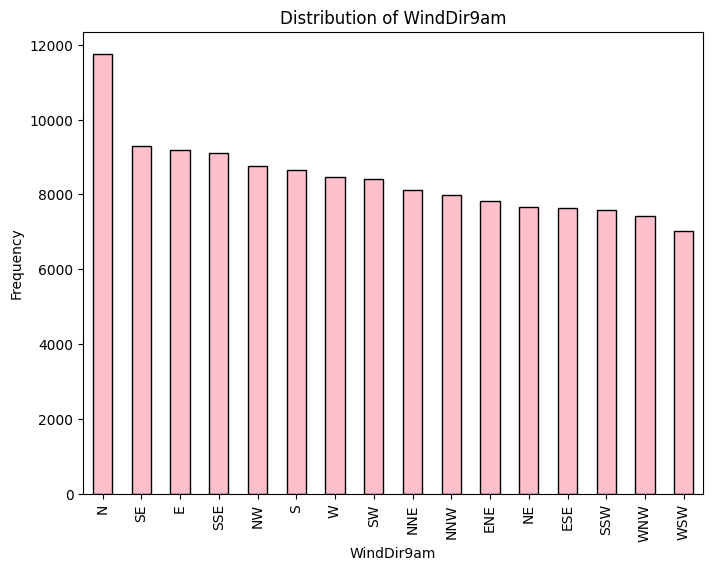

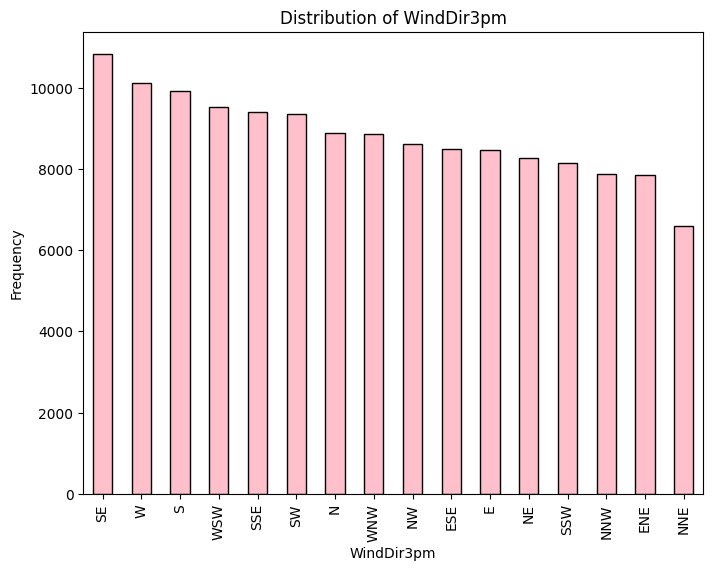

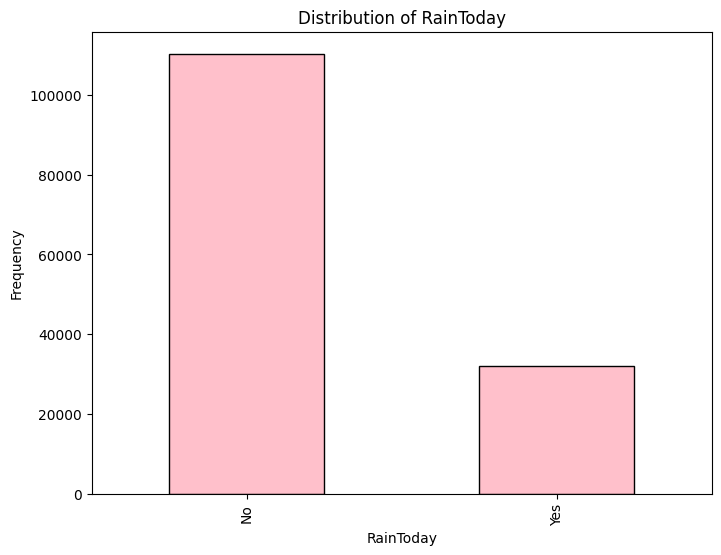

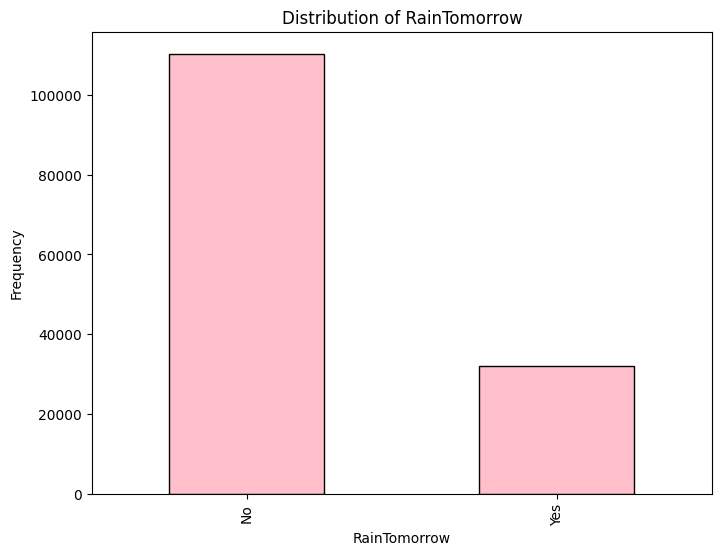

In [15]:
# Distribution of Categorical Variables
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
  plt.figure(figsize=(8,6))
  df[col].value_counts().plot(kind="bar", color="pink", edgecolor="black")
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

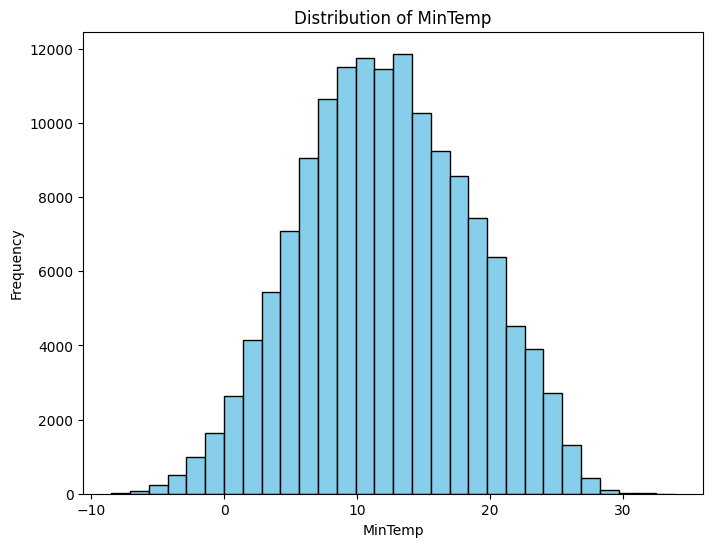

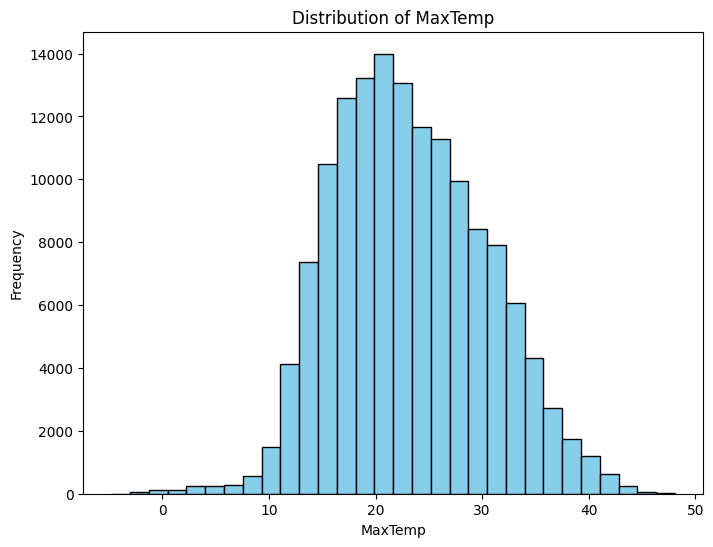

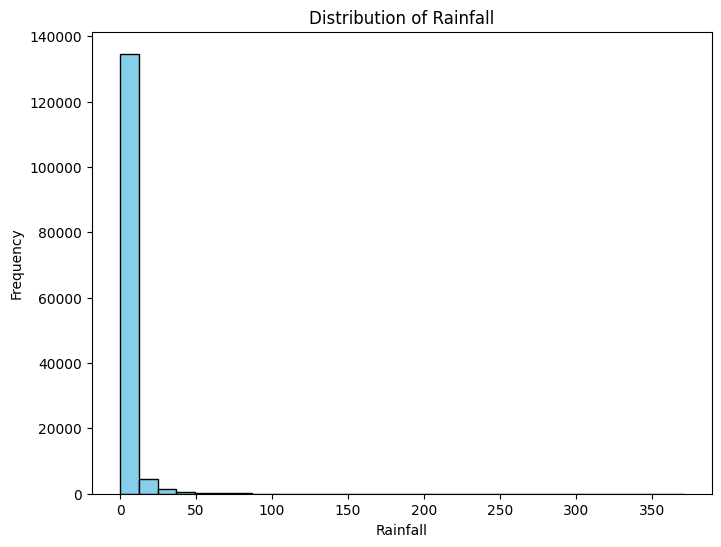

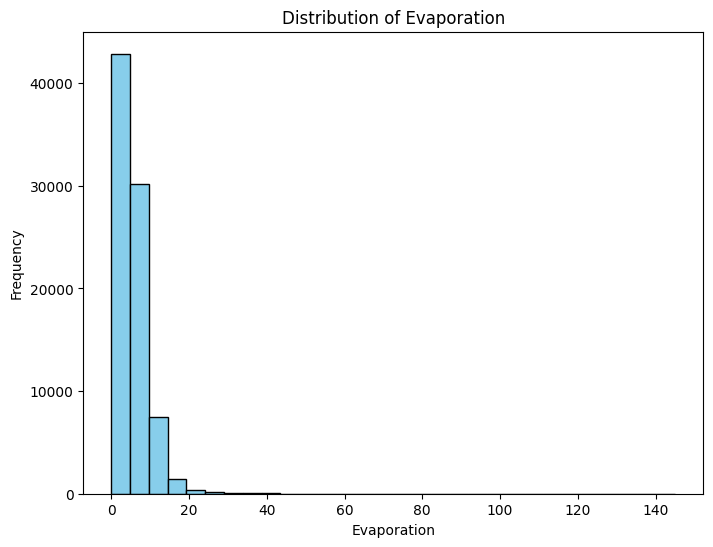

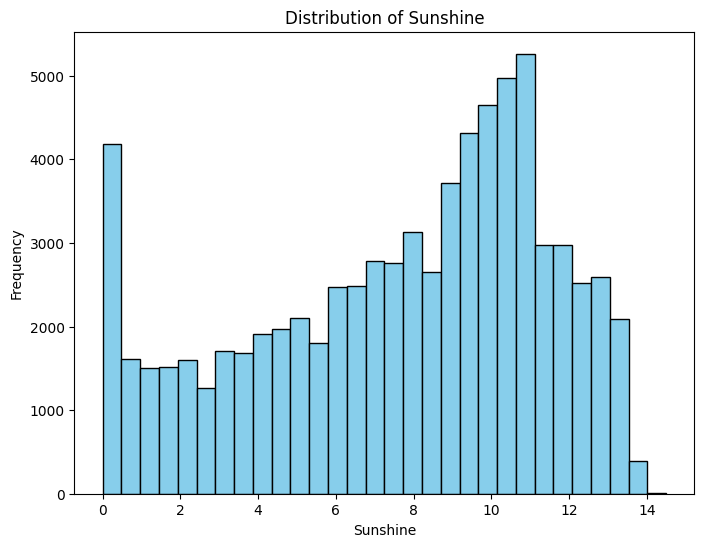

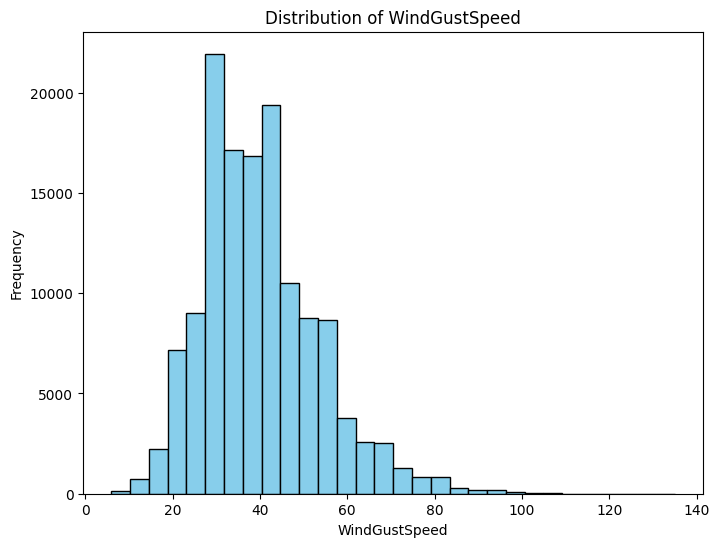

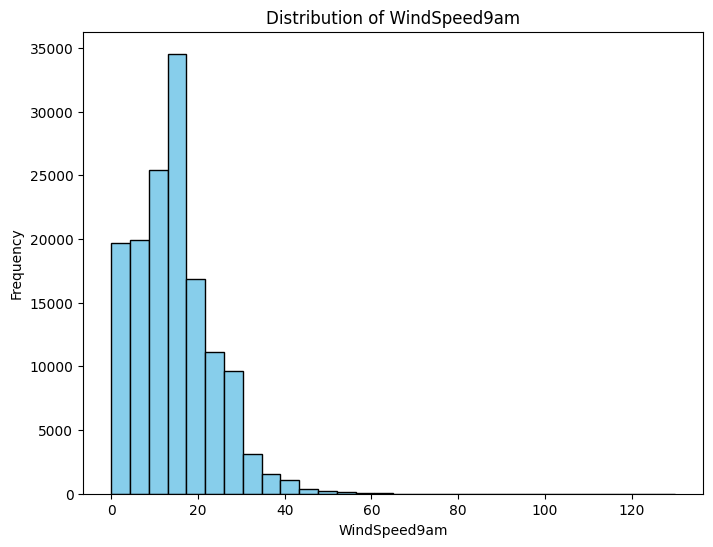

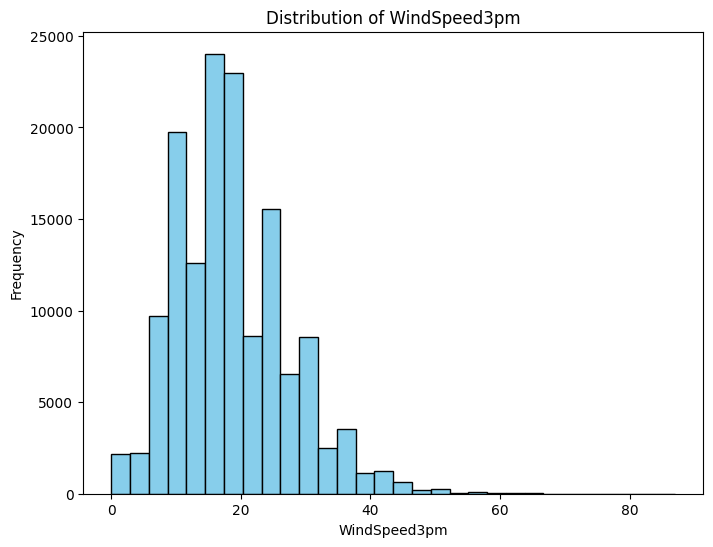

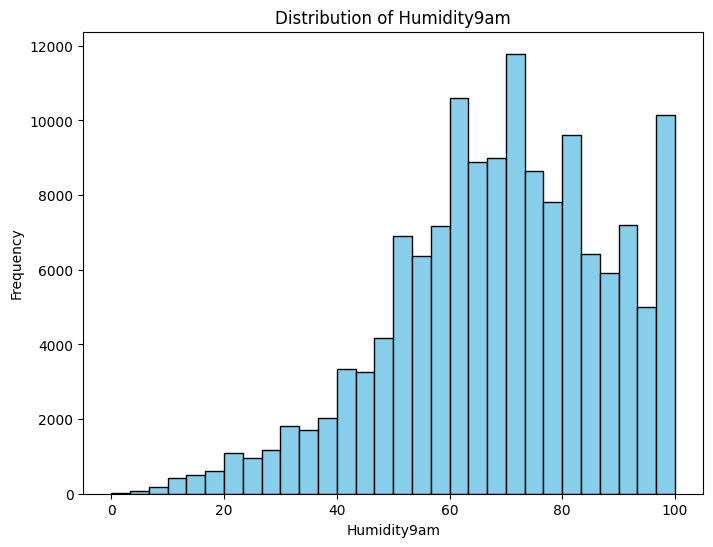

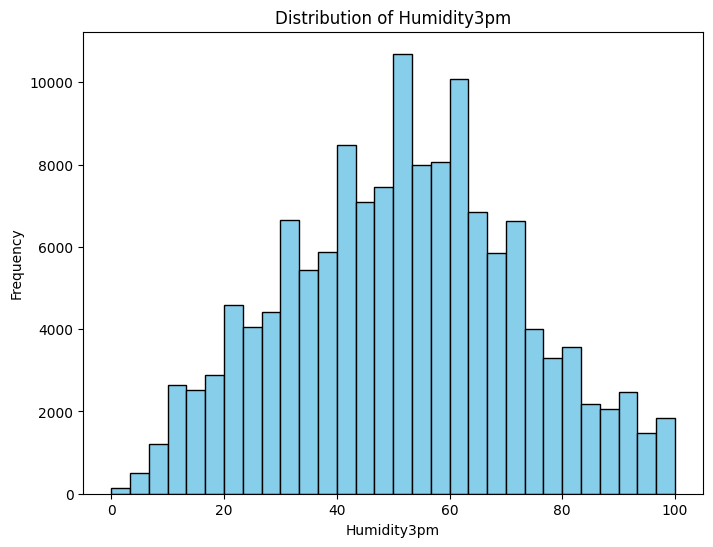

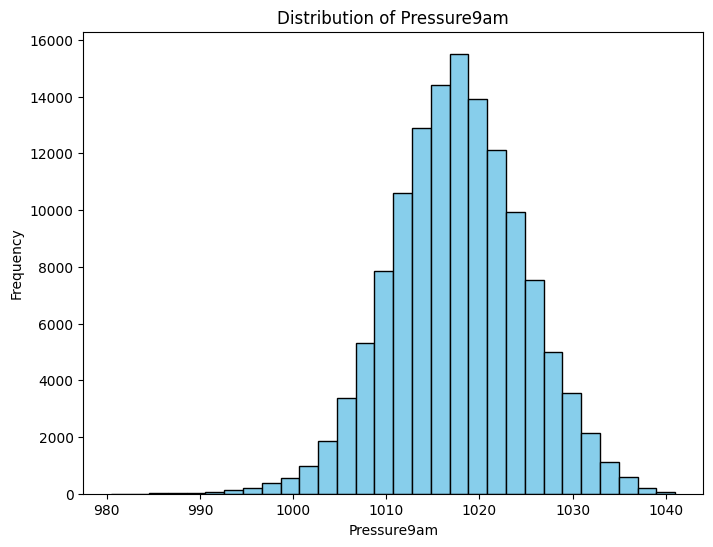

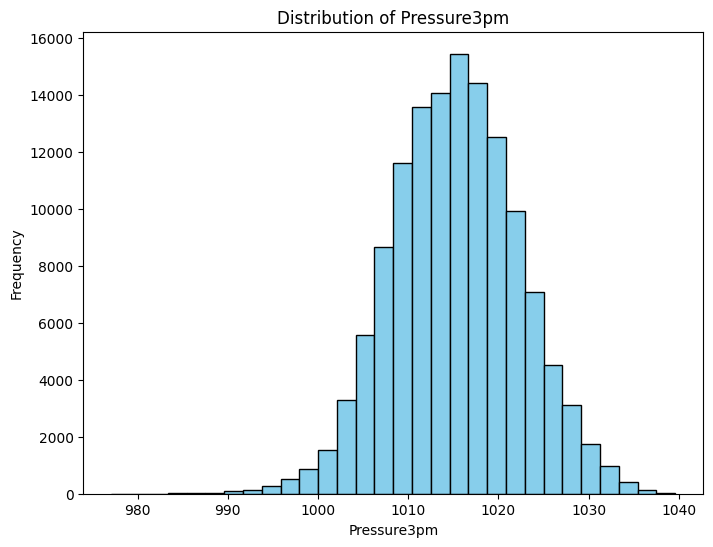

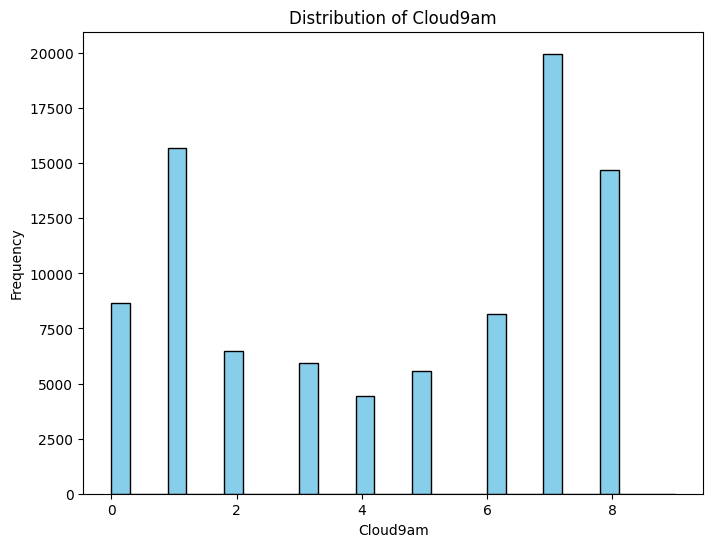

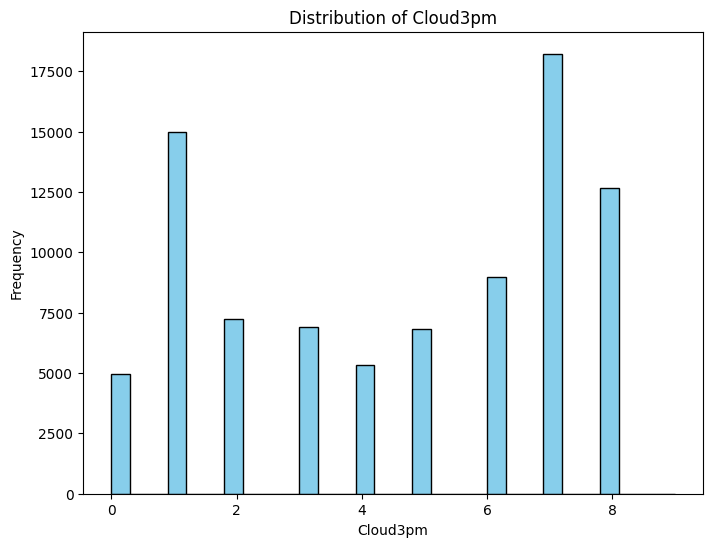

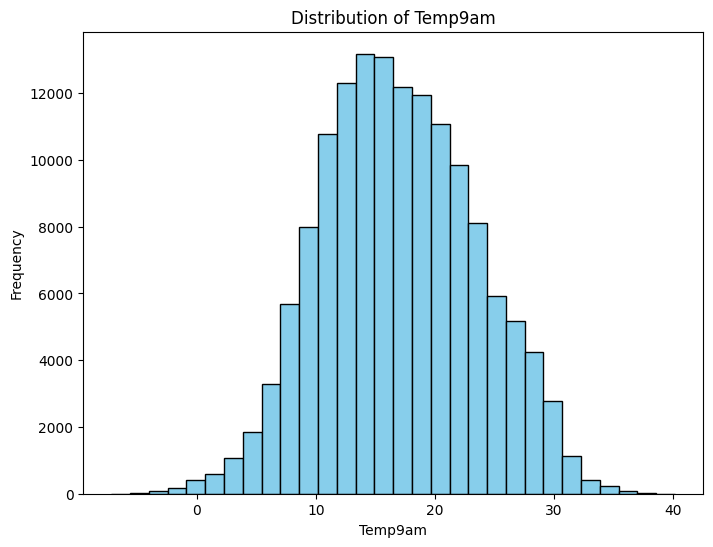

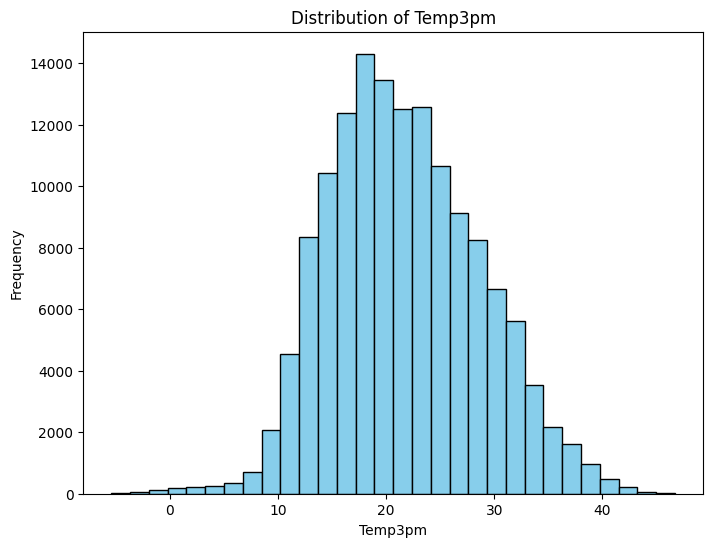

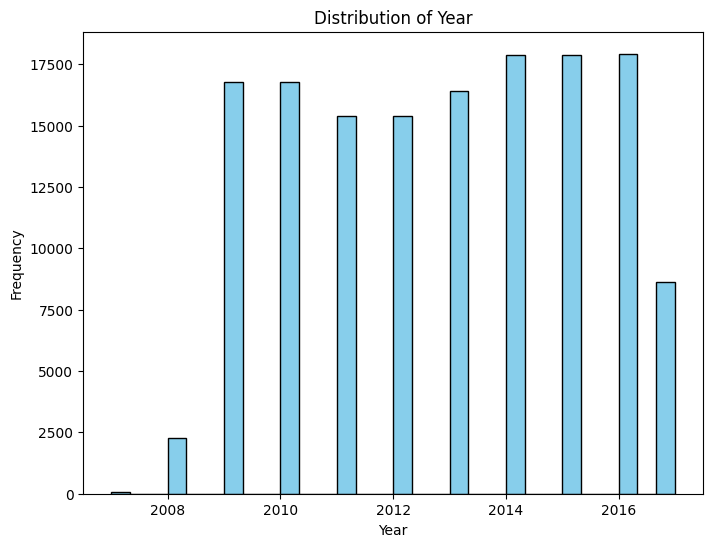

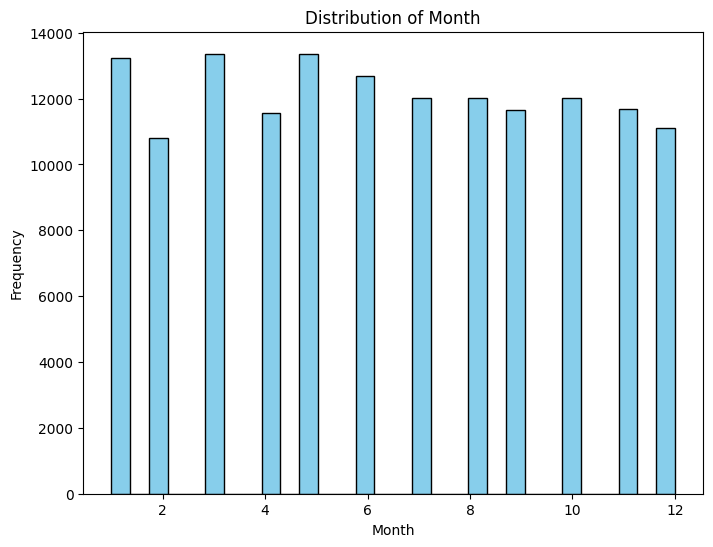

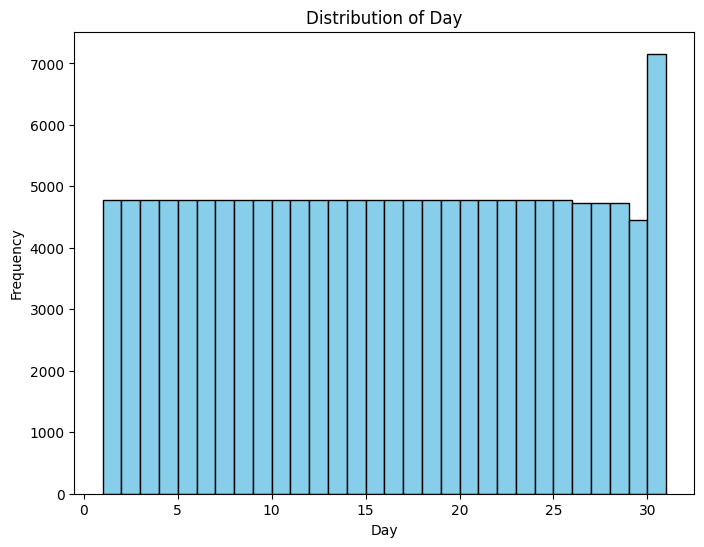

In [16]:
# Distribution of Numerical Variables
num_cols = df.select_dtypes(include=["float64", "int32"]).columns

for col in num_cols:
  plt.figure(figsize=(8,6))
  plt.hist(df[col].dropna(), bins=30, color="skyblue", edgecolor="black")
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

### Outlier Detection

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Especially outliers are observed in `Rainfall`, `Evaporation`, `WindGustSpeed` and `WindSpeed9am` features.

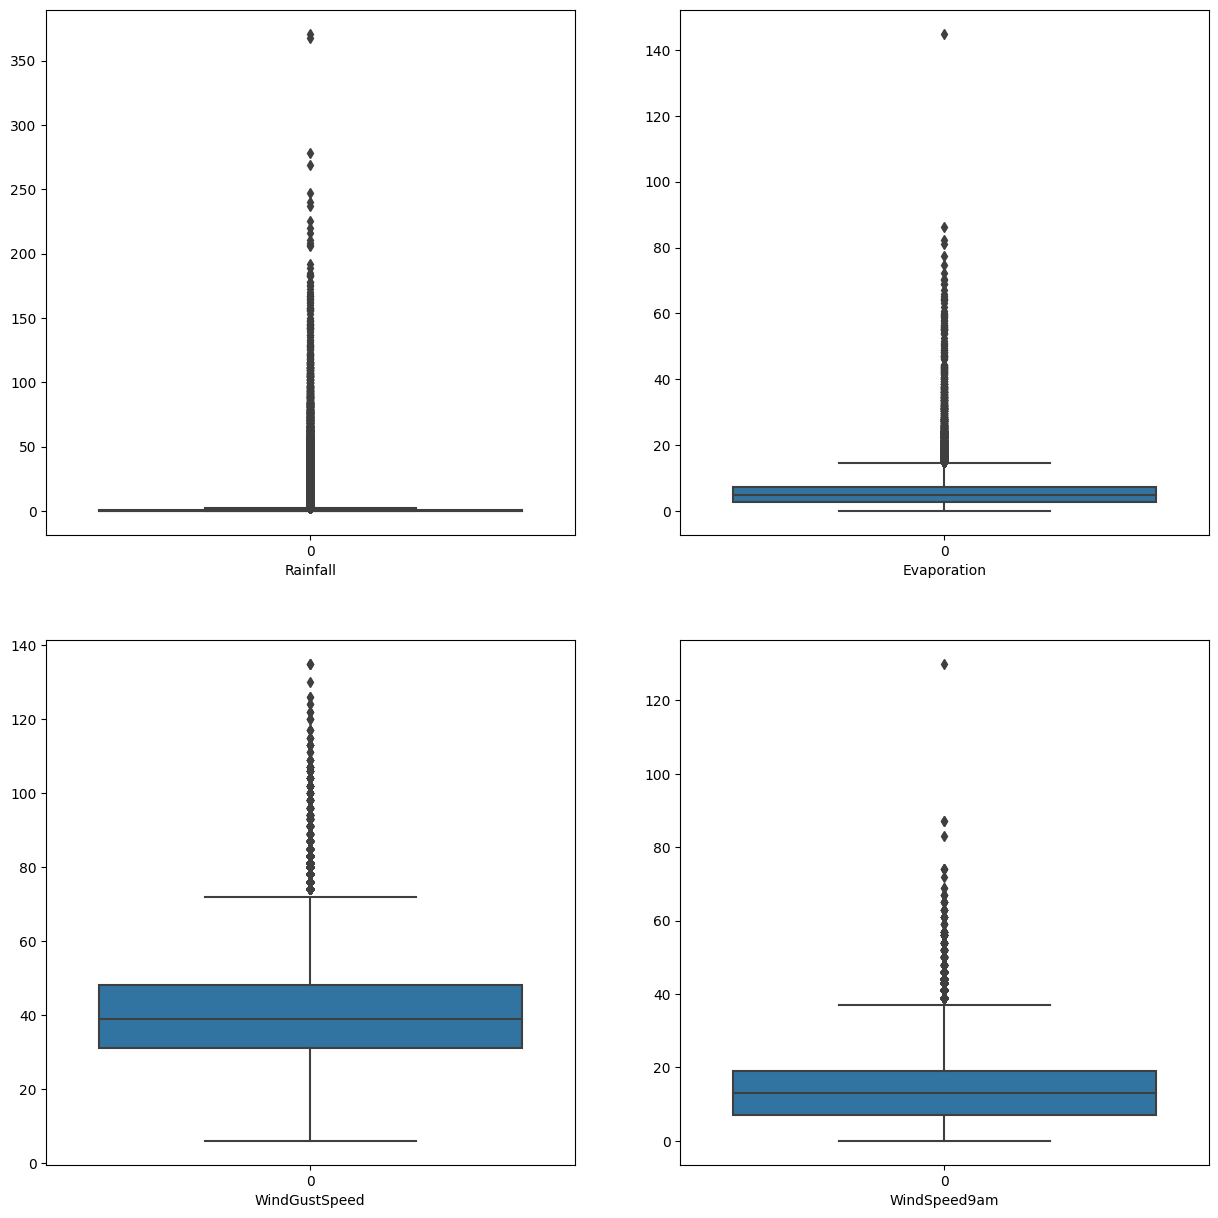

In [18]:
# Visualization of Outliers
plt.figure(figsize= (15,15))

plt.subplot(2,2,1)
sns.boxplot(df["Rainfall"])
plt.xlabel("Rainfall")

plt.subplot(2,2,2)
sns.boxplot(df["Evaporation"])
plt.xlabel("Evaporation")

plt.subplot(2,2,3)
sns.boxplot(df["WindGustSpeed"])
plt.xlabel("WindGustSpeed")

plt.subplot(2,2,4)
sns.boxplot(df["WindSpeed9am"])
plt.xlabel("WindSpeed9am")

plt.show()

In [19]:
def outlier_thresholds(df, col, q1=0.25, q3=0.75):
    Q1 = df[col].quantile(q1)
    Q3 = df[col].quantile(q3)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    return up_limit, low_limit

In [20]:
print("Rainfall thresholds: ", outlier_thresholds(df, "Rainfall"))
print("Evaporation thresholds: ",outlier_thresholds(df, "Evaporation"))
print("WindGustSpeed thresholds: ",outlier_thresholds(df, "WindGustSpeed"))
print("WindSpeed9am thresholds: ",outlier_thresholds(df, "WindSpeed9am"))

Rainfall thresholds:  (2.0, -1.2000000000000002)
Evaporation thresholds:  (14.600000000000001, -4.600000000000001)
WindGustSpeed thresholds:  (73.5, 5.5)
WindSpeed9am thresholds:  (37.0, -11.0)


## Bivariate Analysis

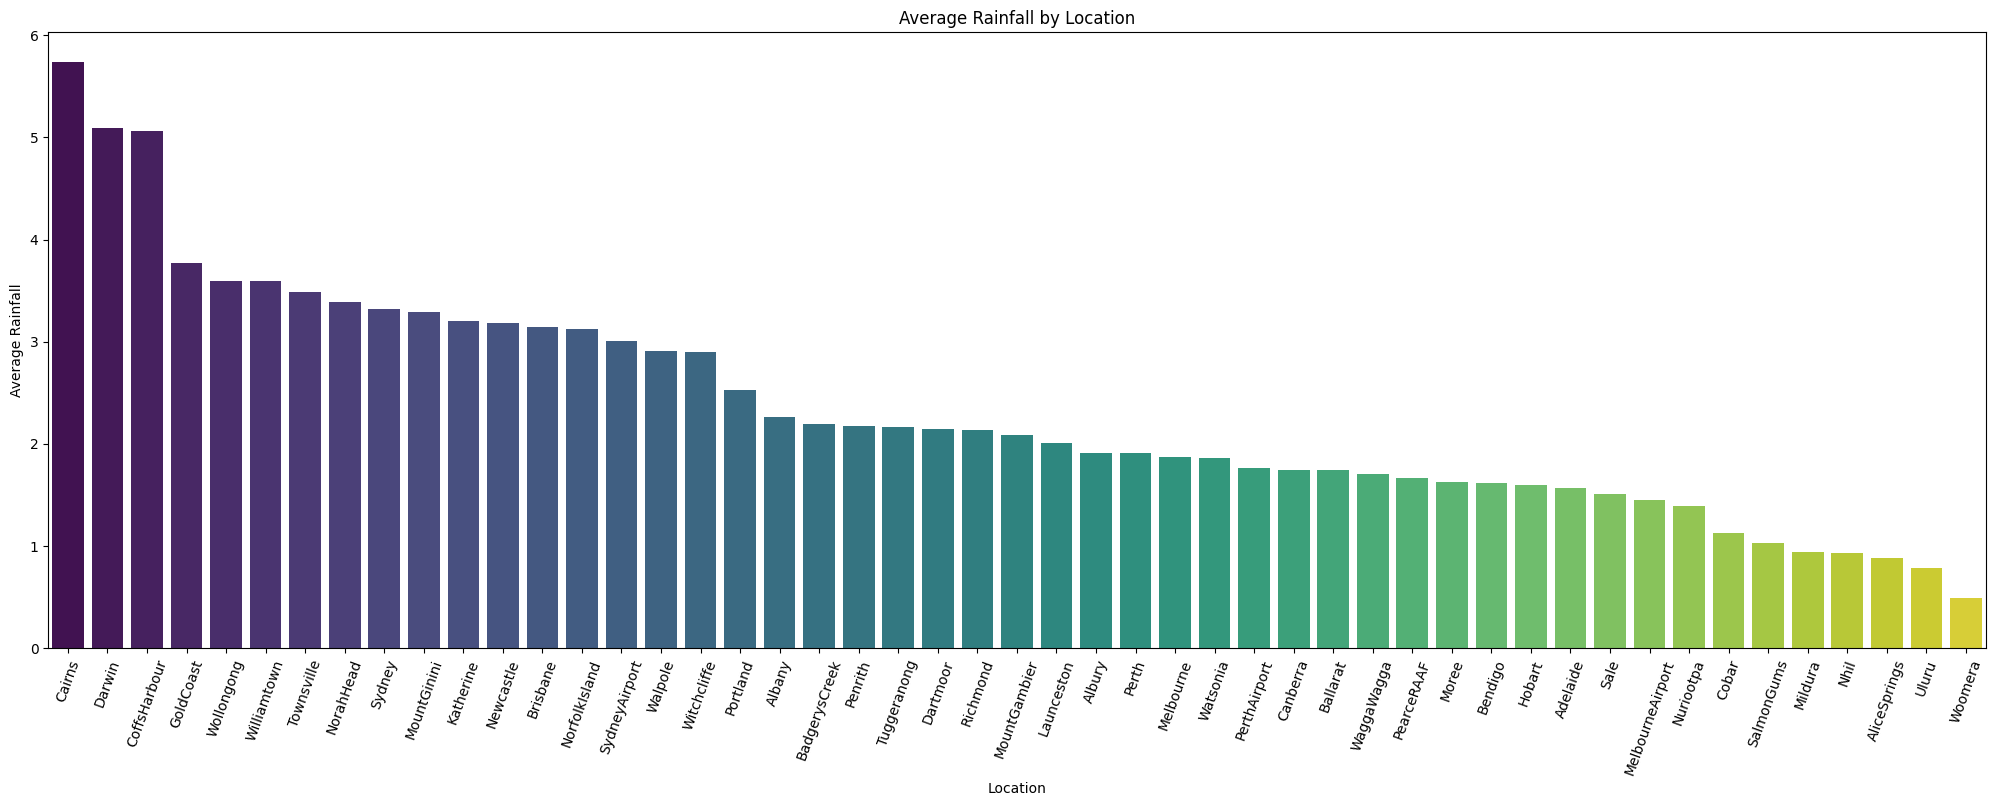

In [21]:
# Average rainfall by location
rain_by_location = (
    df.groupby("Location")["Rainfall"]
    .mean()
    .sort_values(ascending = False)
)

plt.figure(figsize=(25,8))
sns.barplot(x=rain_by_location.index, y=rain_by_location.values,
            palette="viridis")
plt.title("Average Rainfall by Location")
plt.xlabel("Location")
plt.ylabel("Average Rainfall")
plt.xticks(rotation=70)
plt.show()

* While Cairns is the location where rainfall is most frequent, Woomera is the location where it is least frequent.

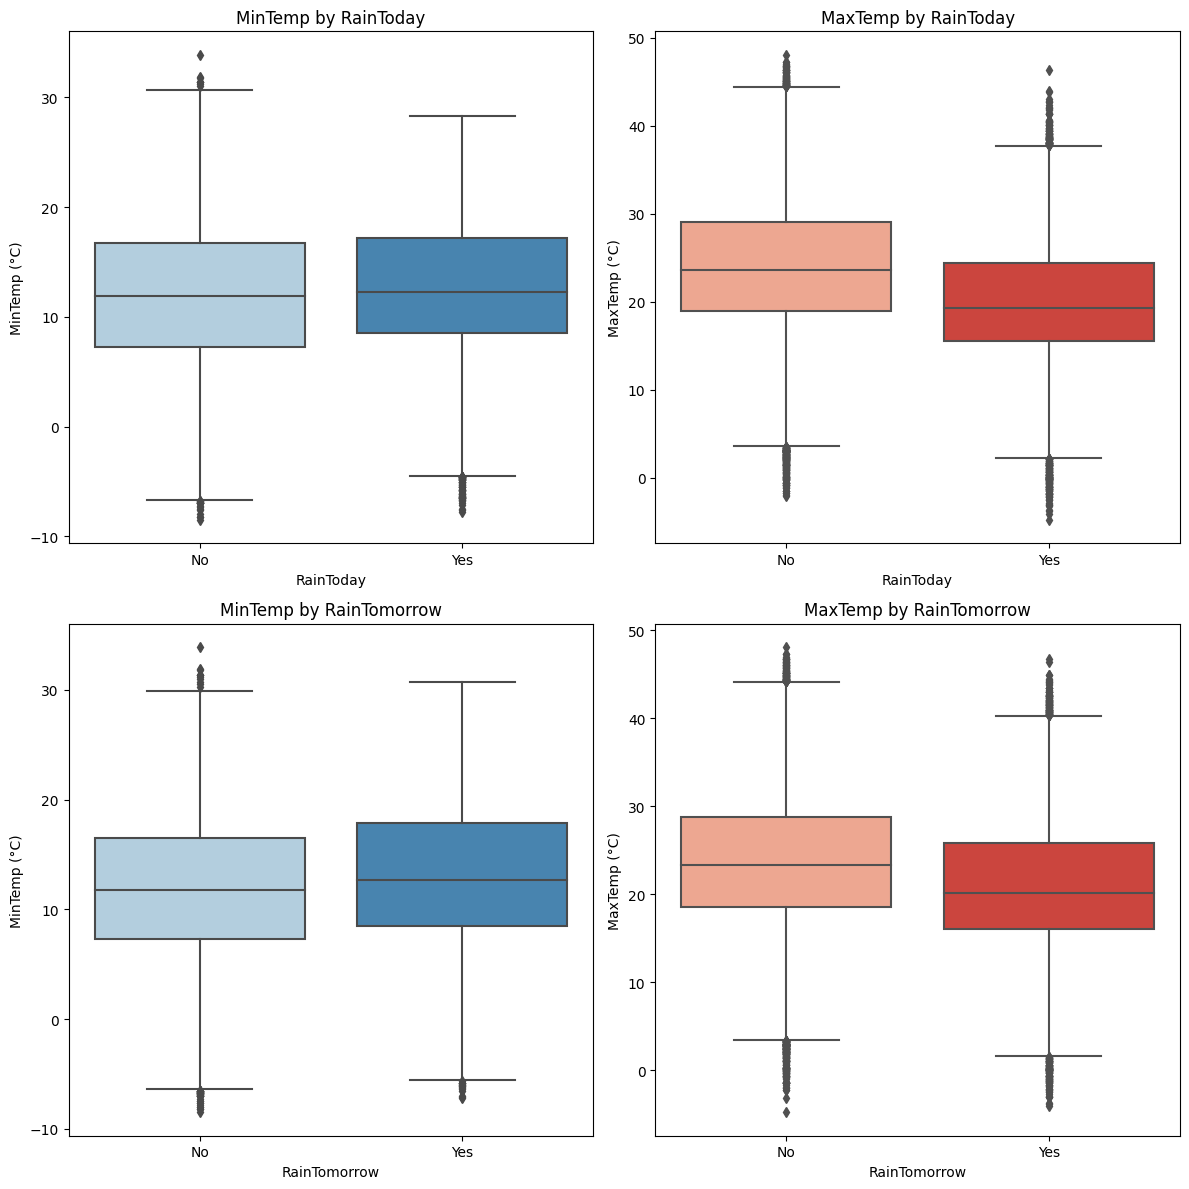

In [22]:
# Change in maximum and minimum temperature during rainfall
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.boxplot(x="RainToday", y="MinTemp", data=df, palette="Blues")
plt.title("MinTemp by RainToday")
plt.xlabel("RainToday")
plt.ylabel("MinTemp (°C)")

plt.subplot(2,2,2)
sns.boxplot(x="RainToday", y="MaxTemp", data=df, palette="Reds")
plt.title("MaxTemp by RainToday")
plt.xlabel("RainToday")
plt.ylabel("MaxTemp (°C)")

plt.subplot(2,2,3)
sns.boxplot(x="RainTomorrow", y="MinTemp", data=df, palette="Blues")
plt.title("MinTemp by RainTomorrow")
plt.xlabel("RainTomorrow")
plt.ylabel("MinTemp (°C)")

plt.subplot(2,2,4)
sns.boxplot(x="RainTomorrow", y="MaxTemp", data=df, palette="Reds")
plt.title("MaxTemp by RainTomorrow")
plt.xlabel("RainTomorrow")
plt.ylabel("MaxTemp (°C)")

plt.tight_layout()
plt.show()

* Maximum temperature tends to be lower on days with rainfall than on days without rainfall.

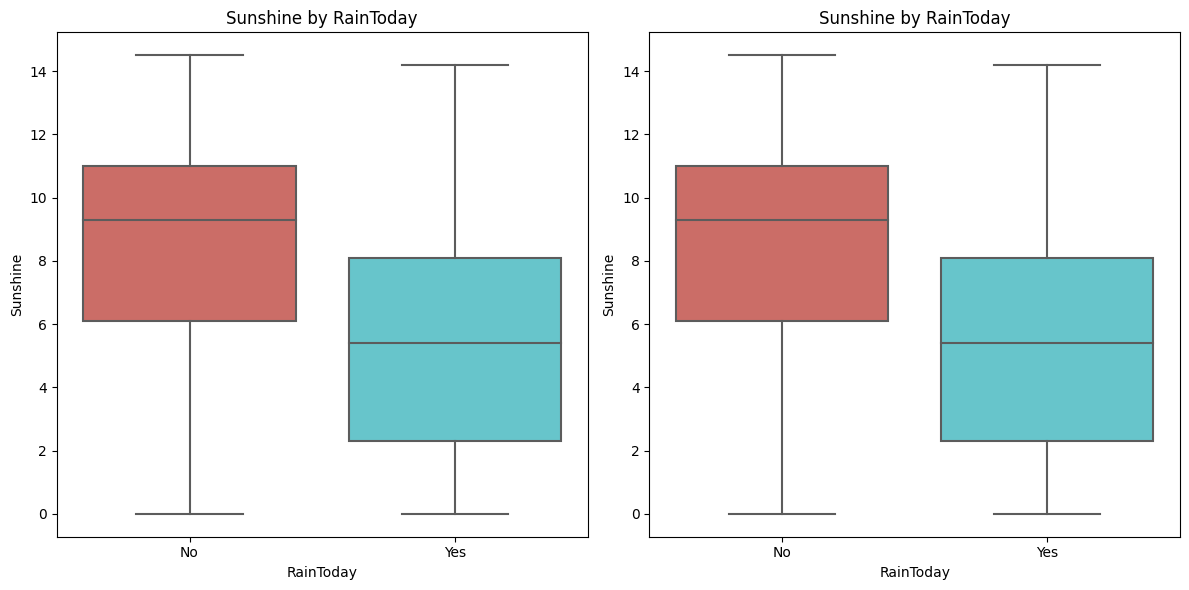

In [23]:
# Sunlight duration according to rainfall
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x="RainToday", y="Sunshine", data=df, palette="hls")
plt.title("Sunshine by RainToday")
plt.xlabel("RainToday")
plt.ylabel("Sunshine")

plt.subplot(1,2,2)
sns.boxplot(x="RainToday", y="Sunshine", data=df, palette="hls")
plt.title("Sunshine by RainToday")
plt.xlabel("RainToday")
plt.ylabel("Sunshine")

plt.tight_layout()
plt.show()

## Multivariate Analysis

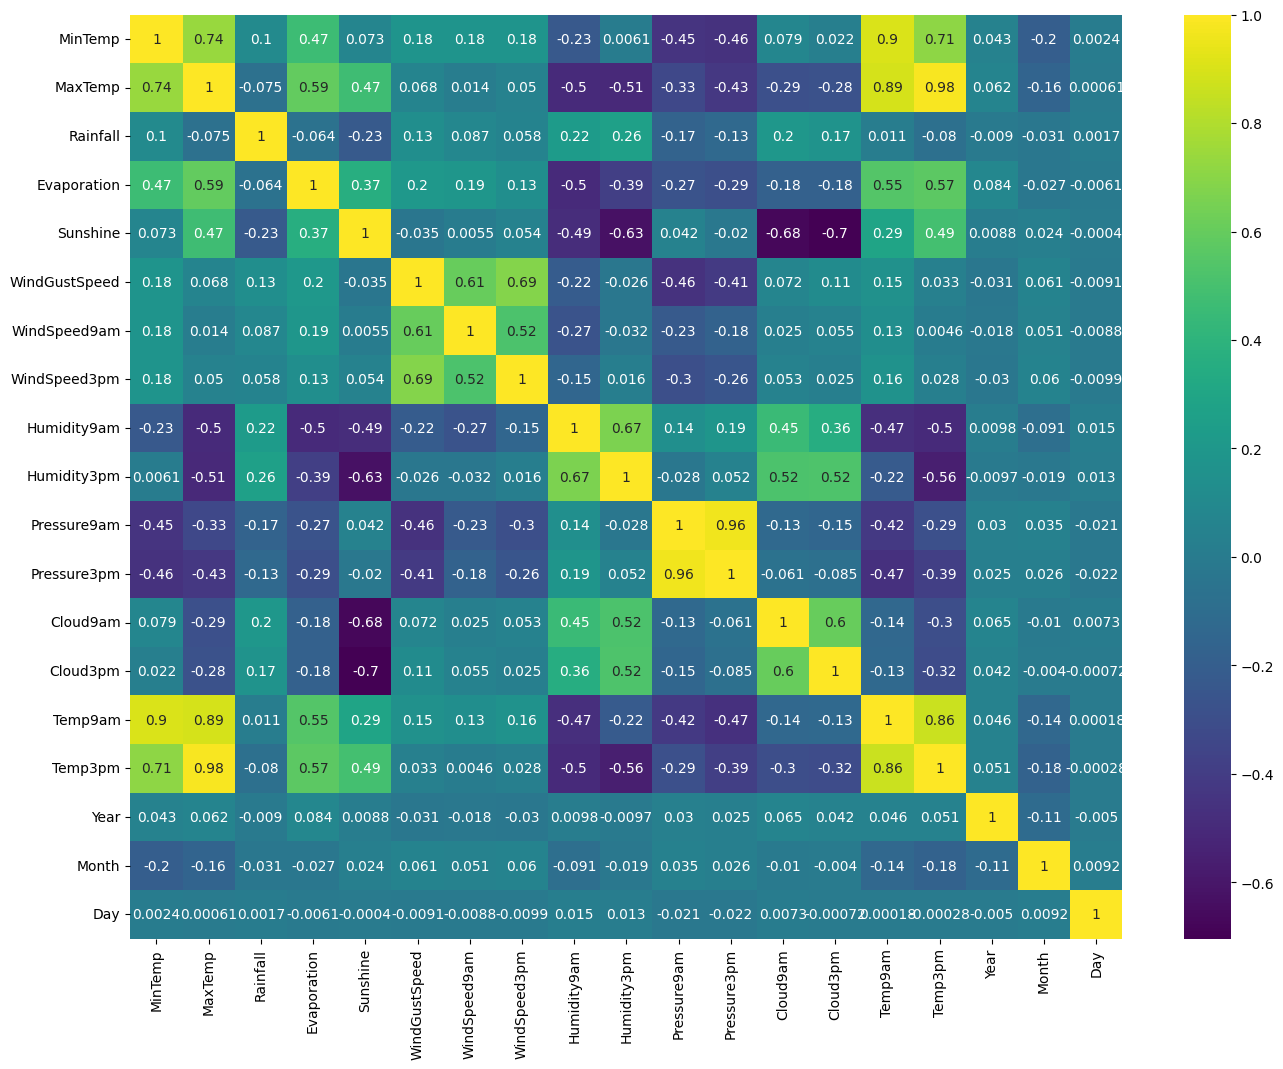

In [24]:
plt.figure(figsize=(16,12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot = True, cmap = "viridis")
plt.show()

* `MinTemp` and `Temp9am` variables are highly positively correlated.
* `MaxTemp` and `Temp3m` variables are highly positively correlated.
* `Sunshine` and `Cloud3pm` variables are negatively  correlated.

# Data Preprocessing

### Handling Missing Values

In [25]:
df[num_cols].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [26]:
# Handling Missing Values for Numerical Variables

for i in num_cols:
  df[i].fillna(df[i].median(), inplace = True)
  print(f"{i} has {df[i].isnull().sum()} missing values")

MinTemp has 0 missing values
MaxTemp has 0 missing values
Rainfall has 0 missing values
Evaporation has 0 missing values
Sunshine has 0 missing values
WindGustSpeed has 0 missing values
WindSpeed9am has 0 missing values
WindSpeed3pm has 0 missing values
Humidity9am has 0 missing values
Humidity3pm has 0 missing values
Pressure9am has 0 missing values
Pressure3pm has 0 missing values
Cloud9am has 0 missing values
Cloud3pm has 0 missing values
Temp9am has 0 missing values
Temp3pm has 0 missing values
Year has 0 missing values
Month has 0 missing values
Day has 0 missing values


In [27]:
df[cat_cols].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [28]:
# Handling Missing Values for Categorical Variables

for i in cat_cols:
  df[i].fillna(df[i].mode()[0], inplace = True)
  print(f"{i} has {df[i].isnull().sum()} missing values")

Location has 0 missing values
WindGustDir has 0 missing values
WindDir9am has 0 missing values
WindDir3pm has 0 missing values
RainToday has 0 missing values
RainTomorrow has 0 missing values


In [29]:
# Percentage of missing data in every column
(df.isnull().sum()/len(df))*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Year             0.0
Month            0.0
Day              0.0
dtype: float64

### Handling Outliers

In [30]:
def replace_with_thresholds(df, col):
    up_limit, low_limit = outlier_thresholds(df, col)
    df.loc[df[col] > up_limit, col] = up_limit
    df.loc[df[col] < low_limit, col] = low_limit

In [31]:
replace_with_thresholds(df, "Rainfall")
replace_with_thresholds(df, "Evaporation")
replace_with_thresholds(df, "WindGustSpeed")
replace_with_thresholds(df, "WindSpeed9am")

### Encoding

In [32]:
# Applying label encoder
le = LabelEncoder()

for i in cat_cols:
  df[i] = le.fit_transform(df[i])

### Scaling

In [33]:
# Standardizing numerical variables
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [34]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,0.189757,-0.044575,0.358714,0.033745,0.14871,13,0.357816,13,14,...,-1.223012,1.464068,0.137693,-0.013506,0.019135,0,0,-1.879575,1.634076,-1.672844
1,2,-0.752786,0.265794,-0.627098,0.033745,0.14871,14,0.357816,6,15,...,-1.117969,0.149133,0.137693,0.033011,0.384064,0,0,-1.879575,1.634076,-1.559140
2,2,0.111212,0.350440,-0.627098,0.033745,0.14871,15,0.522075,13,15,...,-0.982915,0.149133,-1.286294,0.622225,0.223495,0,0,-1.879575,1.634076,-1.445436
3,2,-0.470023,0.674917,-0.627098,0.033745,0.14871,4,-1.284777,9,0,...,-0.367666,0.149133,0.137693,0.172562,0.705202,0,0,-1.879575,1.634076,-1.331732
4,2,0.833828,1.281548,1.015921,0.033745,0.14871,13,0.111427,1,7,...,-1.388078,1.025756,1.561680,0.126045,1.172312,0,0,-1.879575,1.634076,-1.218028


# Model Building

In [35]:
# Train test split
X = df.drop("RainTomorrow", axis = 1)
y = df["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [36]:
X.shape

(145460, 24)

### Logistic Regression

In [37]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [38]:
# Model Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8428433933727485 

Confusion Matrix: 
 [[21439  1233]
 [ 3339  3081]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22672
           1       0.71      0.48      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



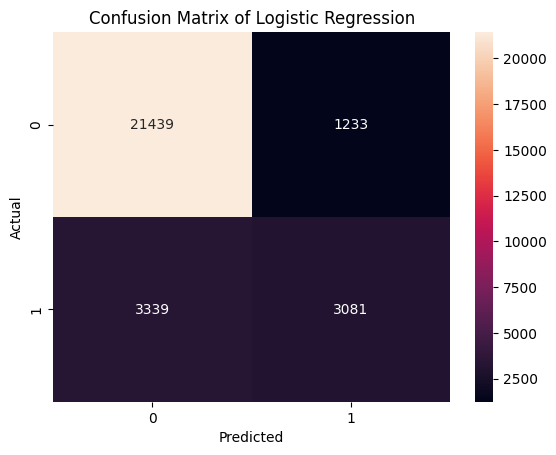

In [39]:
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [40]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"penalty":["l1", "l2", "elasticnet", "none"],
     "C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
     "solver":["liblinear", "newton-cg", "lbfgs"],
     "max_iter":[100, 1000, 2500, 5000]}
]

cv_log_model = GridSearchCV(log_model, param_grid, cv=5, scoring="accuracy")

In [41]:
cv_log_model.fit(X_train, y_train)
print("Best Parameters: ", cv_log_model.best_params_)
print("Best Score: ", cv_log_model.best_score_)

Best Parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.8443042517247882


In [42]:
best_params = cv_log_model.best_params_
log_model_tuned = LogisticRegression(**best_params)
log_model_tuned.fit(X_train, y_train)
y_pred = log_model_tuned.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8421559191530318 

Confusion Matrix: 
 [[21441  1231]
 [ 3361  3059]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.48      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



### Random Forest

In [43]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [44]:
# Model Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8526399010037123 

Confusion Matrix: 
 [[21676   996]
 [ 3291  3129]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22672
           1       0.76      0.49      0.59      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



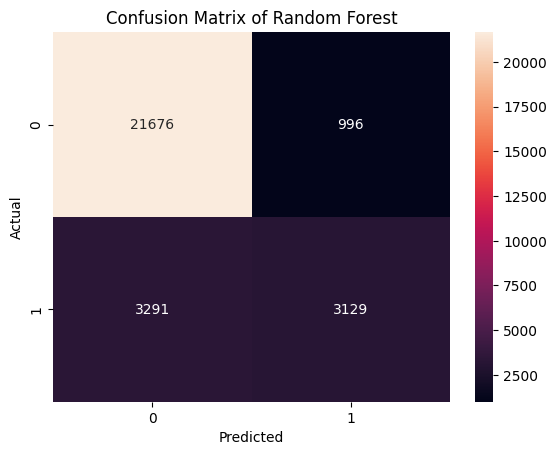

In [45]:
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')
plt.show()

In [46]:
# Hyperparameter Tuning
rf_params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": list(range(1,10)),
    "max_features": ["sqrt", "log2", None],
}
cv_rf_model = GridSearchCV(rf_model, rf_params, cv=5, scoring="accuracy")

In [47]:
cv_rf_model.fit(X_train, y_train)
print("Best Parameters: ", cv_rf_model.best_params_)
print("Best Score: ", cv_rf_model.best_score_)

Best Parameters:  {'max_depth': 9, 'max_features': None, 'n_estimators': 500}
Best Score:  0.8506548045801233


In [48]:
best_params = cv_rf_model.best_params_
rf_model_tuned = RandomForestClassifier(**best_params)
rf_model_tuned.fit(X_train, y_train)
y_pred = rf_model_tuned.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8453870479857005 

Confusion Matrix: 
 [[21662  1010]
 [ 3488  2932]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     22672
           1       0.74      0.46      0.57      6420

    accuracy                           0.85     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.84      0.85      0.83     29092



### XGBoost

In [49]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [50]:
# Model Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8575897153856731 

Confusion Matrix: 
 [[21452  1220]
 [ 2923  3497]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     22672
           1       0.74      0.54      0.63      6420

    accuracy                           0.86     29092
   macro avg       0.81      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



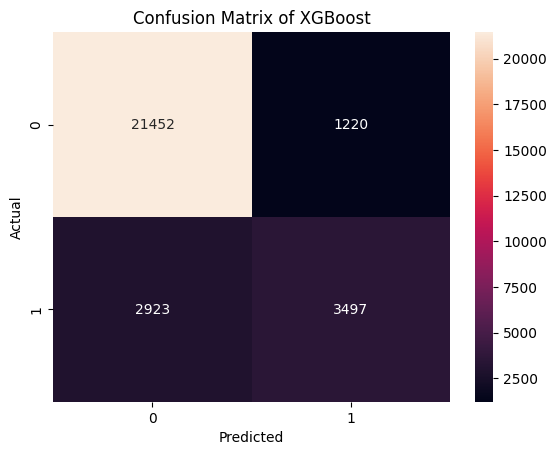

In [51]:
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of XGBoost')
plt.show()

In [52]:
# Hyperparameter Tuning
xgb_params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": list(range(1,10)),
}

cv_xgb_model = GridSearchCV(xgb_model, xgb_params, cv=5, scoring="accuracy")

In [53]:
cv_xgb_model.fit(X_train, y_train)
print("Best Parameters: ", cv_xgb_model.best_params_)
print("Best Score: ", cv_xgb_model.best_score_)

Best Parameters:  {'max_depth': 9, 'n_estimators': 1000}
Best Score:  0.8621356449533609


In [54]:
best_params = cv_xgb_model.best_params_
xgb_model_tuned = XGBClassifier(**best_params)
xgb_model_tuned.fit(X_train, y_train)
y_pred = xgb_model_tuned.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8610614601952427 

Confusion Matrix: 
 [[21361  1311]
 [ 2731  3689]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     22672
           1       0.74      0.57      0.65      6420

    accuracy                           0.86     29092
   macro avg       0.81      0.76      0.78     29092
weighted avg       0.85      0.86      0.85     29092

